**DECISION TREE REGRESSION (CART)**

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.


1.   Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
2.   The logic behind the decision tree can be easily understood because it shows a tree-like structure.



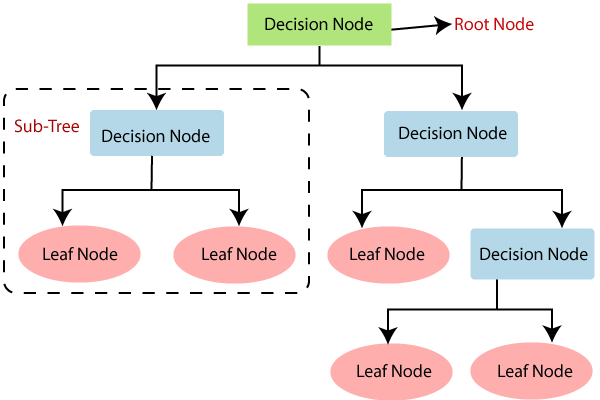

**Decision Tree Terminologies**

**1.Root Node:** Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.

**2.Leaf Node:** Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.

**3.Splitting:** Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.

**4.Branch/Sub Tree:** A tree formed by splitting the tree.

**5.Pruning:** Pruning is the process of removing the unwanted branches from the tree.

**6.Parent/Child node:** The root node of the tree is called the parent node, and other nodes are called the child nodes.

**Decision tree regression**

A regression tree is basically a decision tree that is used for the task of regression which can be used to predict continuous valued outputs instead of discrete output

**How does algorithem work?**

In a decision tree, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. This algorithm compares the values of root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node.

For the next node, the algorithm again compares the attribute value with the other sub-nodes and move further. It continues the process until it reaches the leaf node of the tree.

Step-1: Begin the tree with the root node, says S, which contains the complete dataset.

Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).

Step-3: Divide the S into subsets that contains possible values for the best attributes.

Step-4: Generate the decision tree node, which contains the best attribute.

Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

Refference

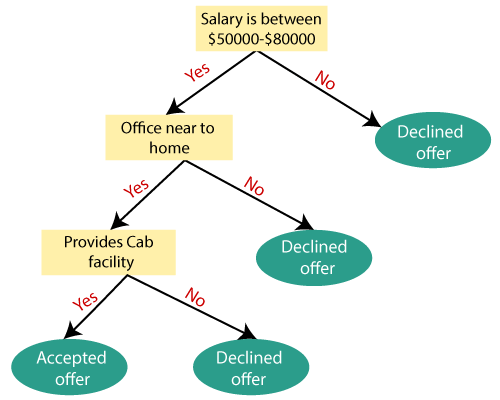

In [64]:
import pandas as pd          
import numpy as np 
import seaborn as sns # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs


In [65]:
df = pd.read_csv("HousingData.csv")
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


**The dataset contains information about 506 houses in Boston, Massachusetts in the 1970s. Each house is described by 13 features, including:**

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town

B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT: % lower status of the population

The target variable in this dataset is the median value of owner-occupied homes in $1000s, which is a continuous variable.
where the objective is to predict the median value of owner-occupied homes based on the 13 features provided.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [67]:
## checking the percentage of nan values present in each feature

features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

CRIM 0.0395  % missing values
ZN 0.0395  % missing values
INDUS 0.0395  % missing values
CHAS 0.0395  % missing values
AGE 0.0395  % missing values
LSTAT 0.0395  % missing values


In [68]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [69]:
df = df.fillna(df.mean())

<AxesSubplot:>

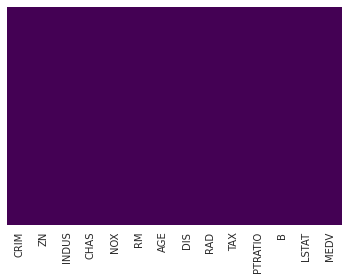

In [70]:
# Checking the null values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [71]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualisizing the numerical variables
df[numerical_features].head()

Number of numerical variables:  14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [72]:


discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [73]:
discrete_feature

['CHAS', 'RAD']

In [74]:
df['CHAS'].value_counts()

0.000000    452
1.000000     34
0.069959     20
Name: CHAS, dtype: int64

<AxesSubplot:xlabel='CHAS', ylabel='count'>

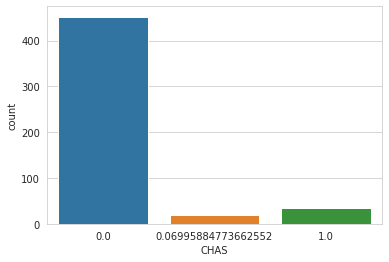

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',data=df)

In [76]:
df['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

<AxesSubplot:xlabel='RAD', ylabel='count'>

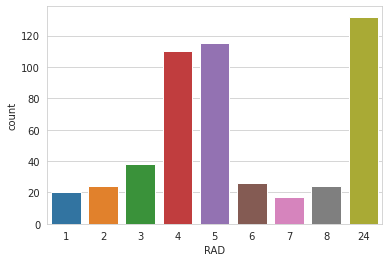

In [77]:
sns.set_style('whitegrid')
sns.countplot(x='RAD',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE'>

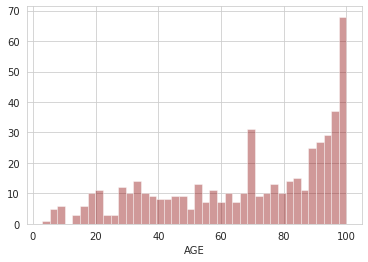

In [78]:
sns.distplot(df['AGE'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='RM'>

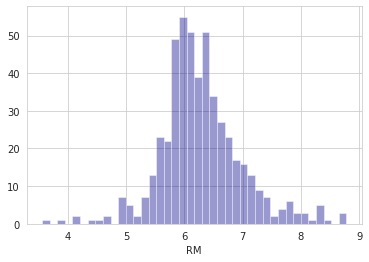

In [79]:
sns.distplot(df['RM'].dropna(),kde=False,color='darkblue',bins=40)

In [80]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 12


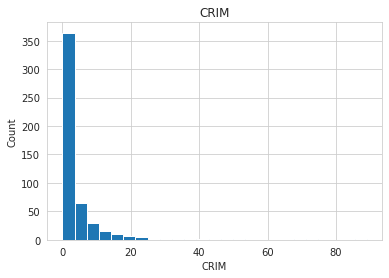

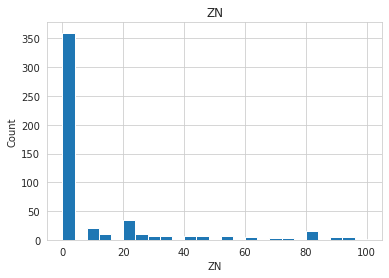

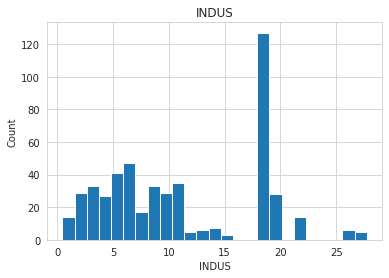

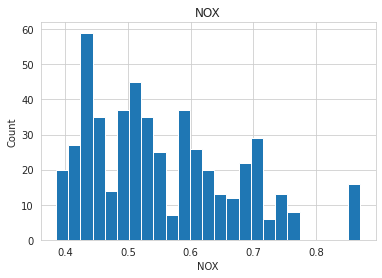

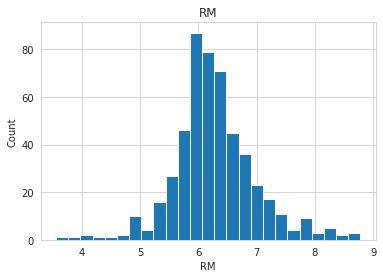

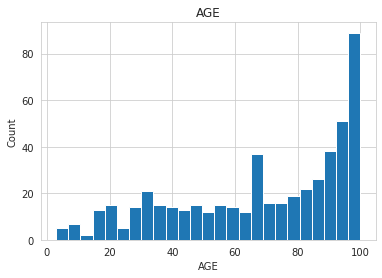

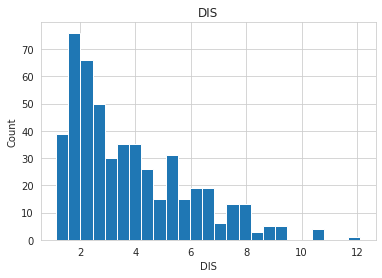

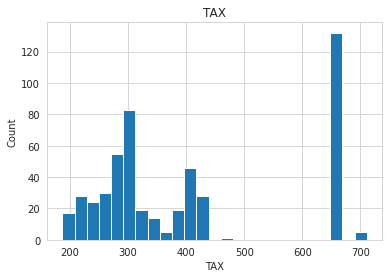

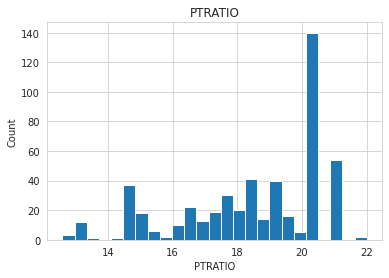

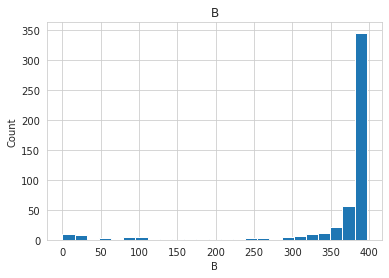

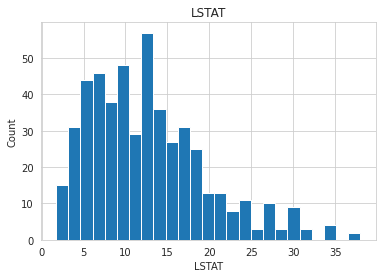

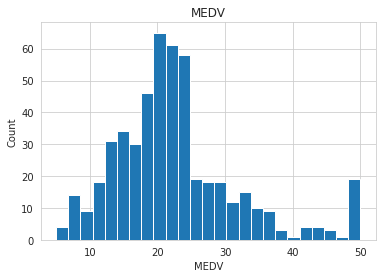

In [81]:
##  analysing the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


In [82]:
# Check the  Statistical Numerical Data Distribution Summary
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [83]:
corr=df.corr()

<AxesSubplot:>

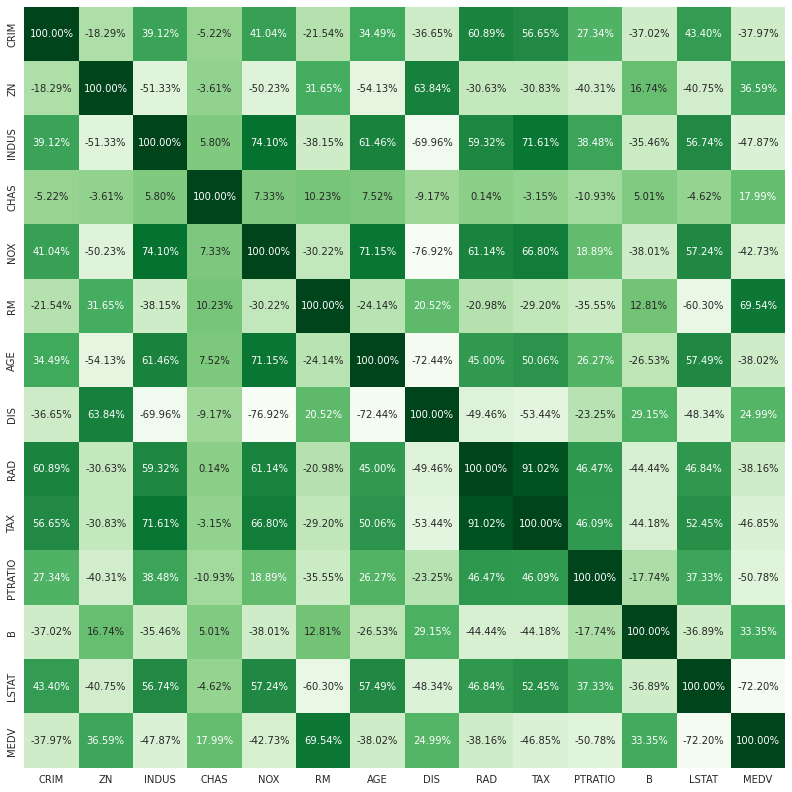

In [84]:

# Plotting the heatmap of correlation between features
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens') # the correlation between the columns

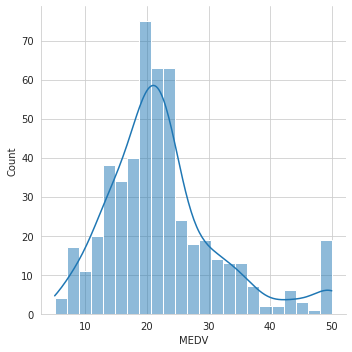

In [85]:
sns.displot(df['MEDV'],kde=True)

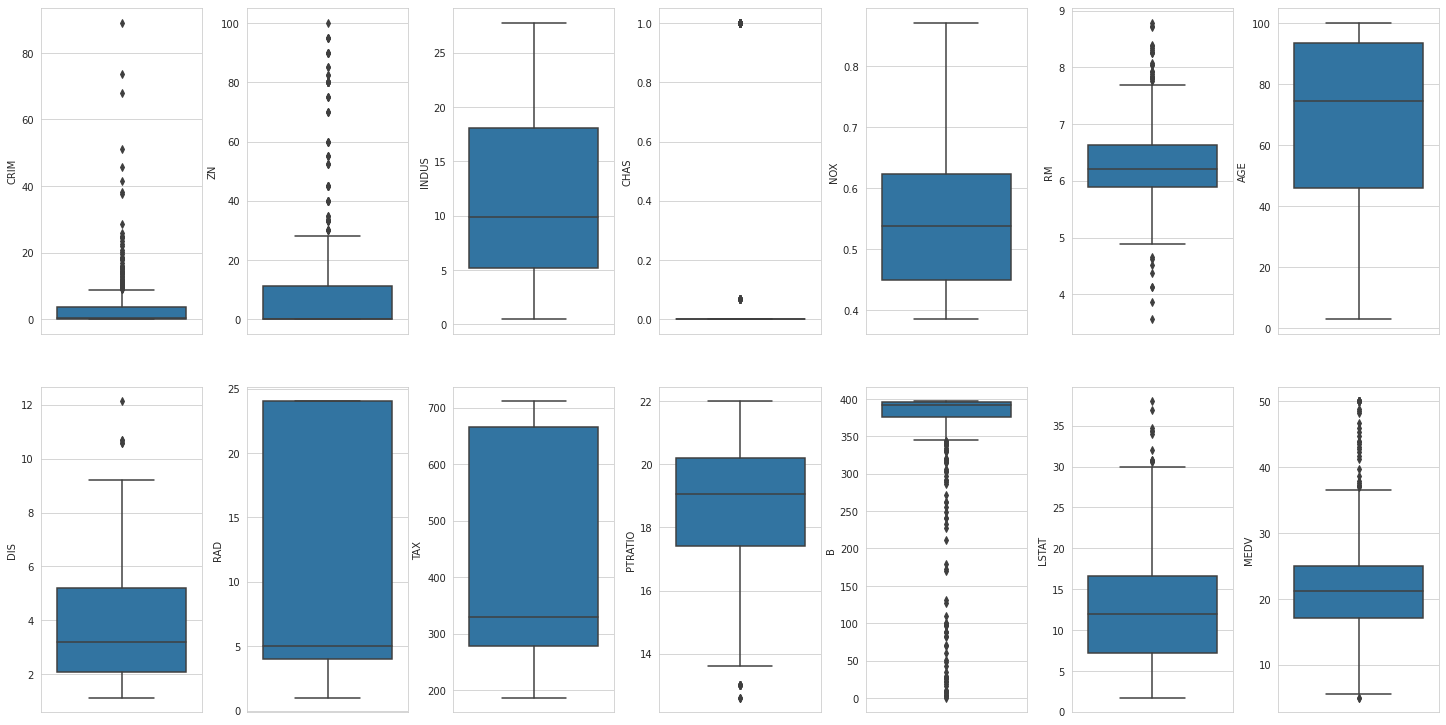

In [86]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [87]:
   for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 12.65%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 2.37%
Column MEDV outliers = 7.91%


In [88]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

         CRIM        ZN     INDUS      CHAS       NOX        RM           AGE  \
0    0.422328  0.296443  1.311010  0.279851  0.144217  0.413672  1.210593e-01   
1    0.419870  0.489639  0.599771  0.279851  0.740262  0.194274  3.787156e-01   
2    0.419872  0.489639  0.599771  0.279851  0.740262  1.282714  2.706270e-01   
3    0.419277  0.489639  1.330435  0.279851  0.835284  1.016303  8.287698e-01   
4    0.414981  0.489639  1.330435  0.279851  0.835284  1.228577  5.223385e-01   
..        ...       ...       ...       ...       ...       ...           ...   
501  0.415733  0.489639  0.126411  0.279851  0.158124  0.439316  2.121240e-02   
502  0.417766  0.489639  0.126411  0.279851  0.158124  0.234548  2.984598e-01   
503  0.415952  0.489639  0.126411  0.279851  0.158124  0.984960  8.201227e-01   
504  0.410232  0.489639  0.126411  0.279851  0.158124  0.725672  7.581068e-01   
505  0.417515  0.489639  0.126411  0.279851  0.158124  0.362767  5.184109e-16   

          DIS       RAD    

In [89]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57,  65,  66, 102, 141, 142, 154, 155, 160, 162, 163,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 208, 209, 210,
       211, 212, 216, 218, 219, 220, 221, 222, 225, 234, 236, 254, 255,
       256, 257, 262, 269, 273, 274, 276, 277, 282, 283, 283, 284, 286,
       290, 291, 292, 347, 348, 351, 352, 353, 353, 354, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        5,  3,  3,  1,  1,  1,  5,  5,  3,  3,  3,  3,  3,  3,  1,  3,  1,
        1,  1,  1,  1,  1,  1,  7,  7,  1,  7,  1,  7,  7,  3,  3,  3,  3,
        3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,  0,  

In [90]:
df = df[(z < 3).all(axis=1)]
df.shape

(403, 14)

In [91]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

In [118]:
from itertools import product
import numpy as np
class DecisionTreeRegressor():
   # called every time an object is created from a class
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
       
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split #specifies the minimum number of samples required to split an internal node
        self.max_depth = max_depth  #determines the maximum depth of the decision tree that will be constructed
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features in the dataset
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            #it will assighn the unique values in the dataset
            possible_thresholds = np.unique(feature_values)
            # loop over all the unique feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null 
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute varience reduction for target variable
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    # if curr_var_red is greater than max_var_red then it will update the best split as this value
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        # if feature value or index is less than or equal to the threshold then the value is assighned to left 
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        # if feature value or index is greater than  to the threshold then the value is assighned to right 
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        # after splitiing it will return the result
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction gfeature'''
        
        weight_l = len(l_child) / len(parent)# it will calculate the varience of the left chaild
        weight_r = len(r_child) / len(parent)# it will calculate the varience of the right chld
        #after calculating varience of left and right child then using this we are going to calculate the varience reduction using this formula 
        #taking sum of the right and left child and subtracting with the varience of parent 
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        #return the varience reduction
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        #it is used to find value of leaf node
        val = np.mean(Y)
        return val  

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
        #it will separate the data into independent and dependet 
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        #this dictionory will store best split value
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
              #if the best split varience reduction is greater than 0 it will build left and right subtree and increases the size of the depth +1
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    
    #it will shows the how the tree will be build 
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        #the feature value is less than or equal to the threshol value of the tree it will make prediction on left tree else make prediction on right tree
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
         # Traverse the decision tree to make a prediction for a single instance
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    def set_params(self, **params):
      for param, value in params.items():
        setattr(self, param, value)
        return self

    def r2_score(y_true, y_pred):
      ss_res = np.sum((y_true - y_pred) ** 2)
      ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
      r2 = 1 - ss_res / ss_tot
      return r2
       
    def mean_squared_error(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse = sum(squared_differences) / len(squared_differences)
      
      return mse

  


    

In [108]:
df.drop(['CHAS','RAD','B'],axis=1)
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)
#print(Y)

In [109]:
import random

def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        random.seed(random_state)
    
    n = len(X)
    test_data = set(random.sample(range(n), int(n * test_size)))
    train_data = set(range(n)) - test_data
    
    X_train = [X[i] for i in train_data]
    X_test = [X[i] for i in test_data]
    y_train = [y[i] for i in train_data]
    y_test = [y[i] for i in test_data]
    return X_train, X_test, y_train, y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=0)

In [110]:
regressor = DecisionTreeRegressor(min_samples_split=5, max_depth=6)
regressor.fit(X_train,Y_train)
regressor.print_tree()


X_5 <= 6.794 ? 26.464813012308234
 left:X_12 <= 14.98 ? 11.44436898211714
  left:X_7 <= 1.1691 ? 4.317541899441341
    left:50.0
    right:X_5 <= 6.54 ? 3.3637121408255375
        left:X_5 <= 6.096 ? 1.5587687988661845
                left:X_0 <= 13.0751 ? 1.221306906906908
                                left:X_7 <= 1.2852 ? 0.8259332379399025
                                                                left:27.9
                                                                right:20.028767123287675
                                right:10.5
                right:X_9 <= 222.0 ? 3.280941296330905
                                left:31.5
                                right:X_12 <= 11.32 ? 1.525493884186254
                                                                left:22.96862745098039
                                                                right:20.3
        right:X_0 <= 5.70818 ? 6.006054658647251
                left:X_5 <= 6.563 ? 2.4123758805297246
            

In [111]:
y_pred = regressor.predict(X_test)

In [112]:
np.sqrt(regressor.mean_squared_error(Y_test,y_pred))

array([5.05973766])

In [113]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,y_pred)
r2

0.688751201159473

In [114]:
import numpy as np
from itertools import product

class GridSearchCV:
    def __init__(self, estimator, param_grid, cv=3):
        self.estimator = estimator
        self.param_grid = param_grid
        self.cv = cv
        
    def fit(self, X, y):
        best_params = None
        best_score = float('-inf')
        
        # Generate all possible combinations of hyperparameters
        param_combinations = list(product(*self.param_grid.values()))
        
        for params in param_combinations:
            # Set the hyperparameters for the estimator
            self.estimator.set_params(**dict(zip(self.param_grid.keys(), params)))
            
            # Perform cross-validation
            scores = []
            for i in range(self.cv):
                # Split the data into training and validation sets
                train_idx = np.arange(len(X)) % self.cv != i
                val_idx = np.arange(len(X)) % self.cv == i
                X_train, y_train = X[train_idx], y[train_idx]
                X_val, y_val = X[val_idx], y[val_idx]
                
                # Fit the estimator and evaluate the score on the validation set
                self.estimator.fit(X_train, y_train)
                score = self.estimator.mean_squared_error(X_val, y_val)
                scores.append(score)
            
            # Calculate the average score over all cross-validation folds
            avg_score = np.mean(scores)
            
            # Update the best score and best hyperparameters
            if avg_score > best_score:
                best_score = avg_score
                best_params = params
        
        # Set the hyperparameters of the estimator to the best found
        self.estimator.set_params(**dict(zip(self.param_grid.keys(), best_params)))
        
        # Fit the estimator on the entire dataset with the best hyperparameters
        self.estimator.fit(X, y)
        
        return self


In [117]:


# Define the hyperparameter grid
param_grid = {'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4]}

# Create a Decision Tree classifier object
estimator = DecisionTreeRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator, param_grid, cv=3)

# Fit the GridSearchCV object to the data
grid_search.fit(X, Y)



print('Best score:', grid_search.estimator.mean_squared_error(X, Y))



Best score: [5.03188357e+02 4.36662148e+02 2.78841202e+02 5.53400257e+02
 5.30088553e+02 3.09245978e+02 3.10649171e+03 3.98572180e+02
 3.52464665e+02 1.68165227e+05 9.63458313e+01 1.26200580e+05
 2.67154322e+02]


In [116]:
from sklearn.metrics import mean_squared_error
from random import randint
from collections import defaultdict

# Define the hyperparameters to be tuned
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 4, 6, 8, 10,12,20,30]
min_samples_leaf = [1, 2, 3, 4, 5,8,10,20]

# Define the number of iterations for hyperparameter tuning
n_iter = 20

# Define the number of folds for cross-validation
n_folds = None

# Define a function for k-fold cross-validation
def k_fold_cv(X, y, model, n_folds):
    # Initialize a dictionary to store the cross-validation scores
    cv_scores = defaultdict(list)

    # Divide the data into k folds
    fold_size = len(X) // n_folds
    fold_starts = [i * fold_size for i in range(n_folds)]
    fold_ends = [(i + 1) * fold_size for i in range(n_folds)]
    fold_ends[-1] = len(X)

    # Perform k-fold cross-validation
    for i in range(n_folds):
        # Split the data into training and validation sets
        X_train = np.concatenate([X[:fold_starts[i]], X[fold_ends[i]:]])
        y_train = np.concatenate([y[:fold_starts[i]], y[fold_ends[i]:]])
        X_valid = X[fold_starts[i]:fold_ends[i]]
        y_valid = y[fold_starts[i]:fold_ends[i]]

        # Define the hyperparameters to be tuned
        params = {'max_depth': max_depth[randint(0, len(max_depth)-1)],
                  'min_samples_split': min_samples_split[randint(0, len(min_samples_split)-1)],
                  'min_samples_leaf': min_samples_leaf[randint(0, len(min_samples_leaf)-1)]}

        # Train the model with the current hyperparameters
        model.set_params(**params)
        model.fit(X_train, y_train)

        # Evaluate the model on the validation set
        y_pred = model.predict(X_valid)
        mse = mean_squared_error(y_valid, y_pred)

        # Store the cross-validation score
        cv_scores[mse].append(params)

    # Return the best hyperparameters and the corresponding mean squared error
    best_params = cv_scores[min(cv_scores)][0]
    best_mse = min(cv_scores)

    return best_params, best_mse


# Define the decision tree regressor model
dt = DecisionTreeRegressor()

# Perform the hyperparameter tuning using k-fold cross-validation and randomized search
best_params, best_mse = k_fold_cv(X, Y, dt, n_folds=10)

# Print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters:", best_params)
print("Best mean squared error:", best_mse)



Best hyperparameters: {'max_depth': 110, 'min_samples_split': 6, 'min_samples_leaf': 20}
Best mean squared error: 9.731
